# Logistic Regression

## Case study - Term deposit prediction
This example demonstrates how to build a linear regression model on a term deposit dataset.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("term-deposit.csv")          # Read data file
df.head()                                     # Show the first samples

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,47.0,management,married,tertiary,no,2351.0,no,no,cellular,2,jun,163,2,84,1,success,yes
1,26.0,admin.,single,secondary,no,255.0,no,no,cellular,14,aug,209,2,106,2,success,yes
2,26.0,admin.,single,secondary,no,256.0,no,no,cellular,14,aug,210,2,106,2,success,yes
3,26.0,admin.,single,secondary,no,257.0,no,no,cellular,14,aug,211,2,106,2,success,yes
4,26.0,admin.,single,secondary,no,258.0,no,no,cellular,14,aug,212,2,106,2,success,yes


This is a dataset to predict the probability at which a bank client wants to have a long-term deposit.
* age:	Age of the client (numeric)
* job:	Type of job (categorical)
* marital:	Marital status of the client (categorical)
* education:	Education level (categorical)
* default:	Credit in default (categorical)
* balance:	Average yearly balance (categorical)
* housing:	Housing loan (categorical)
* loan:	Personal loan (categorical)
* contact:	Type of communication (categorical)
* day:	Contact day (categorical)
* month:	Contact month (categorical)
* duration:	Contact duration (numeric)
* campaign:	number of contacts performed during this campaign to the client
* pdays:	number of days that passed by after the client was last contacted
* previous:	number of contacts performed before this campaign
* poutcome:	outcome of the previous marketing campaign
* y: (target)	Has the client subscribed a term deposit?

In [ ]:
df.info()          # Show dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66024 entries, 0 to 66023
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        66024 non-null  float64
 1   job        66024 non-null  object 
 2   marital    66024 non-null  object 
 3   education  66024 non-null  object 
 4   default    66024 non-null  object 
 5   balance    66024 non-null  float64
 6   housing    66024 non-null  object 
 7   loan       66024 non-null  object 
 8   contact    66024 non-null  object 
 9   day        66024 non-null  int64  
 10  month      66024 non-null  object 
 11  duration   66024 non-null  int64  
 12  campaign   66024 non-null  int64  
 13  pdays      66024 non-null  int64  
 14  previous   66024 non-null  int64  
 15  poutcome   66024 non-null  object 
 16  y          66024 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 8.6+ MB


In [ ]:
print("Statistics of numerical values \n")
print(df.describe())
print()
print("Statistics of numerical and categorial values \n")
print(df.describe(include=[object, float]))

Statistics of numerical values 

                age        balance           day      duration      campaign  \
count  66024.000000   66024.000000  66024.000000  66024.000000  66024.000000   
mean      41.293893    1528.499137     15.697186    408.975221      2.504801   
std       12.431010    3201.683875      8.536963    418.539701      2.706804   
min       -1.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       32.000000     123.000000      8.000000    133.000000      1.000000   
50%       39.000000     551.000000     16.000000    252.000000      2.000000   
75%       49.000000    1676.000000     22.000000    525.000000      3.000000   
max      999.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  66024.000000  66024.000000  
mean      56.840679      0.960272  
std      105.404425      2.439411  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000

#Exploratory Data Analysis

In [ ]:
print("Continuous Columns")
continuous_columns = df.describe().columns
print(continuous_columns)
print()
print("Categorical Columns")
categorical_columns = df.describe(include=[object]).columns
print(categorical_columns)

Continuous Columns
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

Categorical Columns
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

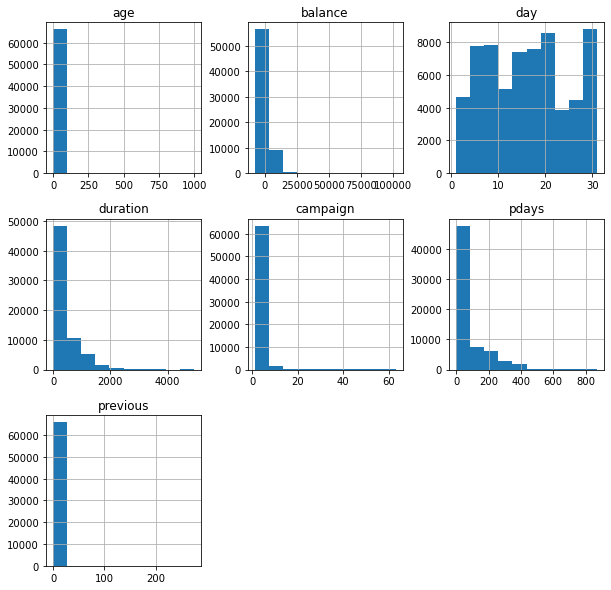

In [ ]:
df.hist(column=continuous_columns, figsize=(10, 10))          # plot histogram of all columns, by default bin=10

In [ ]:
# Check some age values
print("Max age = " + str(np.max(df['age'])))
print("Min age = " + str(np.min(df['age'])))

df_clean = df.drop(df[(df['age']<0) | (df['age']>100)].index)          # Drop rows having age < 0 or age > 100

print("df.shape = " + str(df.shape))
print("df.shape = " + str(df_clean.shape))

Max age = 999.0
Min age = -1.0
df.shape = (66024, 17)
df.shape = (66020, 17)


<AxesSubplot:xlabel='age', ylabel='Count'>

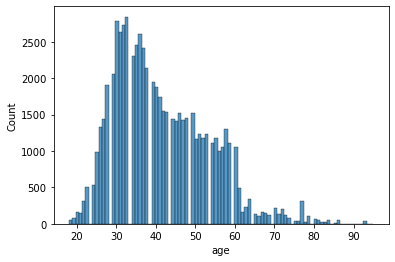

In [ ]:
sns.histplot(x="age", data=df_clean)          # Plot age histogram using Seaborn after cleaning

# Or using matplotlib
# df_clean.hist(column=continous_columns[0], figsize=(10, 10))          # plot histogram of all columns, by default bin=10

<AxesSubplot:xlabel='count', ylabel='job'>

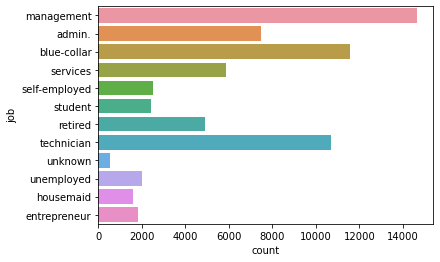

In [ ]:
sns.countplot(y="job", data=df_clean)          # Countplot for categorical variables

<AxesSubplot:xlabel='count', ylabel='job'>

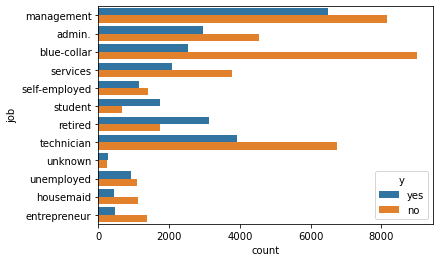

In [ ]:
sns.countplot(y="job", data=df, hue="y")          # Countplot with an additional variable y, using 'hue' parameter to split counts in to category y.

#### Model training

In [ ]:
data = df_clean.copy()
data.head()                    # There are string (categorical) features in the data. They must be converted to numerical values.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,47.0,management,married,tertiary,no,2351.0,no,no,cellular,2,jun,163,2,84,1,success,yes
1,26.0,admin.,single,secondary,no,255.0,no,no,cellular,14,aug,209,2,106,2,success,yes
2,26.0,admin.,single,secondary,no,256.0,no,no,cellular,14,aug,210,2,106,2,success,yes
3,26.0,admin.,single,secondary,no,257.0,no,no,cellular,14,aug,211,2,106,2,success,yes
4,26.0,admin.,single,secondary,no,258.0,no,no,cellular,14,aug,212,2,106,2,success,yes


In [ ]:
# Encode 'education' values

from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder to encode target labels with value between 0 and n_classes-1
label_encoder = LabelEncoder()                  # Initialize label_encoder

education_encoder = label_encoder.fit_transform(data["education"])          # Fit and transform values in 'edication'
data.loc[:, "education"] = education_encoder                                 # Assign ecoded values to replace the original values

In [ ]:
# Convert all string (categorical) features in the data to numerical values.

cat_cols = [col for col in data.columns if data[col].dtypes == object]     # Get the list of string (categorical) features.
print("Categorical features: " +str(cat_cols))
cat_cols.remove("y")                                                       # Remove 'y' column because y is label
print("After removing y: " + str(cat_cols))

for col in cat_cols: 
    category_encoder = label_encoder.fit_transform(data[col])           # Fit and transform values in 'edication'
    data.loc[:, col] = category_encoder                                 # Assign ecoded values to replace the original values

Categorical features: ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
After removing y: ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [ ]:
data.head()          # Now all features x are numerical

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,47.0,4,1,2,0,2351.0,0,0,0,2,6,163,2,84,1,2,yes
1,26.0,0,2,1,0,255.0,0,0,0,14,1,209,2,106,2,2,yes
2,26.0,0,2,1,0,256.0,0,0,0,14,1,210,2,106,2,2,yes
3,26.0,0,2,1,0,257.0,0,0,0,14,1,211,2,106,2,2,yes
4,26.0,0,2,1,0,258.0,0,0,0,14,1,212,2,106,2,2,yes


In [ ]:
# Generate label y
y = data['y']                                        # Initialize label y
y = np.array([0 if i=="no" else 1 for i in y ])      # Set numerical values for label y: y=0 if no, y=1 if others (i.e., yes)
print("Before reshaping: " + str(y.shape))           # One-dimensional array 
y = y.reshape(-1, 1)                                 # Reshape to two-dimensional array. This is requirement of scikit-learn library.
print("After reshaping: " + str(y.shape))

# Generate feature X from data frame
X = data.drop('y', axis=1, inplace=False).values     # Drop column 'y' in data frame, note: axis{0 or ‘index’, 1 or ‘columns’}, default 0. Then convert to array values.

Before reshaping: (66020,)
After reshaping: (66020, 1)


In [ ]:
# Split the dataset to training and testing, ratio 70:30.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)         # Train-test split with fixed random state

print("X_train: " + str(X_train.shape))
print("y_train: " + str(y_train.shape))
print("X_test: " + str(X_test.shape))
print("y_test: " + str(y_test.shape))

X_train: (46214, 16)
y_train: (46214, 1)
X_test: (19806, 16)
y_test: (19806, 1)


In [ ]:
#Scale dataset
from sklearn.preprocessing import StandardScaler     # Import function to perform Standardization
scaler = StandardScaler()                            # Initialize the StandardScaler
X_train_scaler = scaler.fit_transform(X_train)       # Fit (compute mean and std), then transform training data using these values.
X_test_scaler = scaler.transform(X_test)             # ONLY transform test data, using mean and std of training data

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()                      # Initialize Logistic Regression model
logmodel.fit(X_train_scaler, y_train)                # Train the model

# Fix warning by
# logmodel.fit(X_train_scaler, y_train.reshape(-1))  # Train the model

# For higher complexity, use Polynomaial features in sklearn.preprocessing import PolynomialFeatures

/Users/lap13807/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# Calculate test accuracy
logmodel.score(X_test_scaler, y_test)

0.8906896899929314

In [ ]:
# Calculate prediction labels
predictions = logmodel.predict(X_test_scaler)                # Predict labels for X_test_scaler
final_prediction = pd.DataFrame({'target':predictions})      # Import labels to a dataframe 
print(final_prediction)

       target
0           0
1           1
2           0
3           0
4           1
...       ...
19801       0
19802       0
19803       0
19804       0
19805       1

[19806 rows x 1 columns]


In [ ]:
# Evaluation metrics calculation
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Precision: ", precision_score(logmodel.predict(X_test_scaler), y_test))
print("Recall: ", recall_score(logmodel.predict(X_test_scaler), y_test))
print("F1: ", f1_score(logmodel.predict(X_test_scaler), y_test))
print("Confusion matrix: \n", confusion_matrix(logmodel.predict(X_test_scaler), y_test))
print("Classification report: \n", classification_report(logmodel.predict(X_test_scaler), y_test))

Precision:  0.8523147557709476
Recall:  0.8690507152145643
F1:  0.8606013778893825
Confusion matrix: 
 [[10958  1158]
 [ 1007  6683]]
Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91     12116
           1       0.85      0.87      0.86      7690

    accuracy                           0.89     19806
   macro avg       0.88      0.89      0.89     19806
weighted avg       0.89      0.89      0.89     19806

